In [ ]:
!mkdir models
!pip install -q numpy opencv-python matplotlib tensorflow

!bash ./load_models.sh
!wget --quiet https://upload.wikimedia.org/wikipedia/commons/9/99/JPEG_20190317_010417.jpg -O ./data/test_img.jpg

In [19]:
from hand_tracker import HandTracker
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline
print("hello world")

hello world


In [43]:
palm_model_path = ".\\models\\palm_detection.tflite"
landmark_model_path = ".\\models\\hand_landmark.tflite"
anchors_path = ".\\data\\anchors.csv" 

In [53]:
img = cv2.imread('.\\data\\3.jpg')[:,:,::-1]

In [45]:
# box_shift determines 
detector = HandTracker(palm_model_path, landmark_model_path, anchors_path,
                       box_shift=0.2, box_enlarge=1.3)

安装位置: ['C:\\Users\\zys98\\Anaconda3\\envs\\ht-1\\lib\\site-packages\\tensorflow']


21 [[ 343.44743288 1059.39744605]
 [ 343.93199071  867.36558358]
 [ 449.02399032  705.56631057]
 [ 516.99638853  567.35012889]
 [ 556.63416848  435.59581031]
 [ 615.44850482  792.34239855]
 [ 750.86910895  791.31044587]
 [ 646.2011889   834.8310422 ]
 [ 579.59275883  841.64745043]
 [ 626.37076028  909.84086028]
 [ 774.58298178  898.86878926]
 [ 646.72159636  926.83021292]
 [ 588.07544924  924.77741762]
 [ 631.83518753 1010.54607908]
 [ 760.73565606 1021.51313026]
 [ 618.33086257 1022.20672466]
 [ 555.76752028 1003.54510994]
 [ 639.82665772 1093.10580339]
 [ 724.63003586 1109.58890771]
 [ 618.32765601 1095.83024222]
 [ 566.35509604 1074.58497065]] [[ 903.52276611  137.15066528]
 [1416.49041748 1084.66110229]
 [ 468.98016357 1597.62887573]
 [ -43.98748779  650.11843872]]


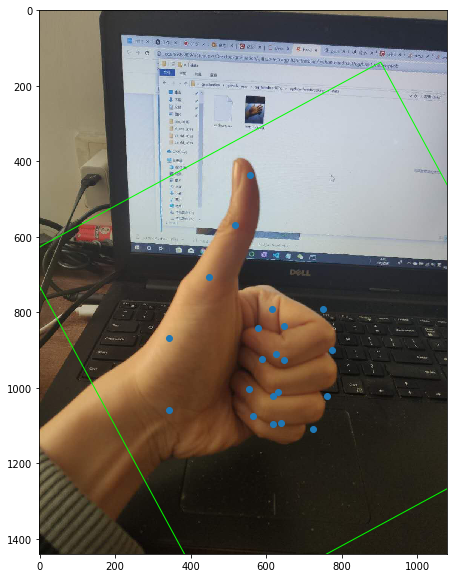

In [54]:
kp, box = detector(img)
print(len(kp),kp, box)
f,ax = plt.subplots(1,1, figsize=(10, 10))

ax.imshow(img)

ax.scatter(kp[:,0], kp[:,1])
ax.add_patch(Polygon(box, color="#00ff00", fill=False))